# KMeans Clustering Algorithm

In [1]:
## import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset for clustering the students
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


Here, we can see there are 200 records and 2 features in this dataset.

First feature is cgpa(Cumulative Grade Point Average) and other is iq(Intelligence Quotient) of the students.

In [3]:
## Calculate the wcss(Within-Cluster Sum of Square)
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [4]:
wcss

[29957.898288,
 4184.14127,
 2362.7133489999997,
 681.96966,
 514.1616803171115,
 398.4039118468833,
 295.4391895943192,
 233.54082485509016,
 198.22433643678949,
 173.0704010967672]

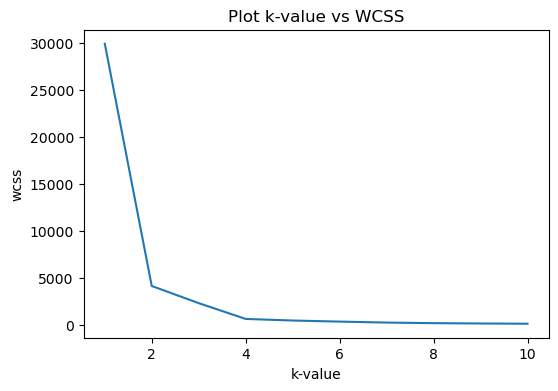

In [5]:
## Using Elbow method to find the k-value
## Plot the line graph to find the k-value(Optimal Point) for clustering
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss)
plt.title('Plot k-value vs WCSS')
plt.xlabel('k-value')
plt.ylabel('wcss')
plt.show()

In this line plot, we can see after point 4 the graph line goes to flatten. Here number of clusters are 4 (k=4) which is shown clearly in this graph.

In [6]:
## Now, train the KMeans algorithm to the dataset and clustering the all students in similar group according their cgpa and iq level.
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [7]:
y_means

array([1, 3, 2, 2, 3, 3, 2, 0, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 3, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3, 1, 3, 1, 2, 2, 1,
       0, 0, 2, 3, 0, 3, 1, 1, 0, 2, 0, 3, 3, 0, 3, 0, 3, 2, 2, 0, 1, 0,
       2, 1, 3, 2, 3, 0, 2, 1, 3, 0, 3, 0, 1, 2, 2, 0, 3, 1, 0, 1, 0, 3,
       0, 3, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 3, 3, 2, 0, 2, 3, 0, 1, 1, 3, 2, 0, 2, 1, 2, 3, 1, 2, 2, 3,
       1, 1, 3, 0, 3, 1, 2, 2, 2, 1, 3, 1, 1, 0, 1, 0, 3, 1, 0, 1, 0, 0,
       1, 2, 3, 0, 3, 2, 1, 0, 3, 2, 0, 1, 3, 1, 1, 0, 0, 3, 0, 1, 1, 2,
       0, 3, 1, 0, 0, 3, 3, 3, 2, 1, 2, 2, 0, 3, 2, 2, 1, 1, 2, 1, 0, 3,
       3, 0])

In [8]:
X[y_means==0,0], X[y_means==0,1],

(array([8.8 , 9.18, 8.86, 8.83, 8.56, 8.96, 8.78, 8.45, 8.79, 8.81, 8.88,
        9.07, 8.92, 8.75, 8.71, 8.86, 9.3 , 9.01, 8.97, 9.  , 8.76, 8.78,
        9.23, 9.03, 9.13, 8.91, 8.98, 9.03, 8.86, 8.89, 8.97, 8.72, 8.93,
        8.58, 8.94, 8.6 , 8.77, 8.81, 8.54, 8.97, 8.91, 8.68, 9.06, 8.9 ,
        8.94, 8.91, 8.91, 8.95, 8.57, 8.82]),
 array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
        117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
        114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
        118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
        115., 115., 117., 116., 118., 117.]))

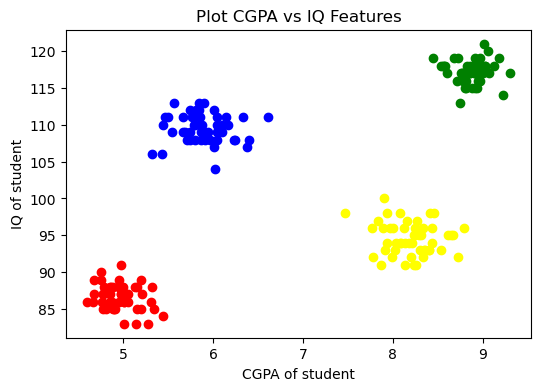

In [10]:
## Scatter the group of students according to their cluster and each group is shown by different colour.
plt.figure(figsize=(6,4))
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='green')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='yellow')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='blue')
plt.title('Plot CGPA vs IQ Features')
plt.xlabel('CGPA of student')
plt.ylabel('IQ of student')
plt.show()

Green Colour Cluster: These students are intelligent and hard-working in the class. CGPA is good as well as IQ is high.

Yellow Colour Cluster: These students are hard-working in the class. CGPA is good but IQ is low.

Blue Colour Cluster: These students are intelligent but not hard-working in the class. CGPA is not good but IQ is high. Can we say "Chill Maar" students. They need motivation and direction to achieve their goal.

Red Colour Cluster: These students are not intelligent as well as not hard-working in the class. CGPA is bad as well as IQ is also very low. They need special attention.